Ridge Regression --- 8:55 min
===

* 8:55 min | Ultima modificación: Octubre 17, 2021 | [YouTube](https://youtu.be/pX2yQOH0x-Q)

En esta metodología se abordan algunos de los problemas de los mínimos cuadrados ordinarios, al imponer la siguiente penalización a los coeficientes:

$$ \sum_{i=1}^N (y_i - g(x_i))^2 + \alpha \sum_{p=1} w_p^2$$

El parámetro $\alpha \ge 0$ controla la penalización, de tal forma que a mayores valores de $\alpha$, el modelo será más robusto a la colinealidad de los parámetros.

En el siguiente ejemplo, se demuestra el efecto en la estabilidad de los coeficientes de un modelo de regresión al aplicar esta metodología

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold, cross_validate

In [2]:
#
# Carga de datos
#
diabetes = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/diabetes.csv"
)

feature_names = diabetes.columns[:-1]
n_features = len(feature_names)

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
#
# Patrones de entrenamiento
#
y = diabetes.pop("Y")
X = diabetes.values

In [4]:
#
# Coeficientes de un modelo de regresión lineal
# computados sobre distintos subconjuntos de
# datos
#
repeatedKFold = RepeatedKFold(n_splits=5, n_repeats=5)

linearRegression = LinearRegression()

cv_model_lr = cross_validate(
    linearRegression,
    X,
    y,
    cv=repeatedKFold,
    return_estimator=True,
)

In [5]:
cv_model_lr["estimator"]

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearRegressio

In [6]:
coefs_lr = pd.DataFrame(
    [estimator.coef_ for estimator in cv_model_lr["estimator"]],
    columns=feature_names,
)

coefs_lr["model"] = "LR"

coefs_lr.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,model
0,12.207936,-231.754126,513.702460,369.502718,-732.745634,404.857799,104.753353,136.891534,716.715746,52.340759,LR
1,-12.410085,-212.806899,520.843783,293.835248,-647.122252,334.160387,14.330955,182.944274,674.149145,80.453574,LR
2,-1.167626,-266.480189,442.345656,345.398459,-731.855691,530.723388,-26.826173,-26.884376,849.195373,69.795995,LR
3,-17.690809,-258.240351,594.325408,274.169712,-893.073018,577.780993,148.166042,161.360412,767.730262,64.326695,LR
4,-26.526236,-231.240262,531.005998,337.016035,-939.801949,513.887172,264.317218,452.029431,740.966447,65.190622,LR


In [7]:
#
# Busca el mejor hiperparametro usando CV sobre
# todos los datos. RidgeCV usa Leave-One_out para
# realizar la validación cruzada.
#
ridgeCV = RidgeCV(alphas=np.logspace(-6, 6, 100))
ridgeCV.fit(X, y)
ridgeCV.alpha_

0.004328761281083062

In [8]:
#
# Coeficientes para un modelo Ridge computados
# sobre distintos subconjuntos de datos.
#
ridge = Ridge(alpha=ridgeCV.alpha_)

cv_model_ridge = cross_validate(
    ridge,
    X,
    y,
    cv=repeatedKFold,
    return_estimator=True,
)

coefs_ridge = pd.DataFrame(
    [estimator.coef_ for estimator in cv_model_ridge["estimator"]],
    columns=feature_names,
)
coefs_ridge["model"] = "RIDGE"

coefs_ridge.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,model
0,6.186533,-212.982309,526.418867,263.739175,-517.166585,258.373297,13.243792,209.650517,628.145064,104.593425,RIDGE
1,17.577820,-269.638844,540.871333,444.115091,-393.167333,156.386447,-42.171785,156.750286,564.604228,35.373742,RIDGE
2,-23.804743,-295.772386,496.949750,302.143005,-560.548636,357.761095,-102.425575,89.441896,630.984109,92.284180,RIDGE
3,-9.084921,-196.016173,533.853350,299.134543,-570.974075,247.101184,52.334517,188.528129,679.919101,46.746037,RIDGE
4,-31.778095,-215.976145,494.845965,306.674950,-430.929529,190.285472,-79.158098,62.292431,674.558262,82.398412,RIDGE


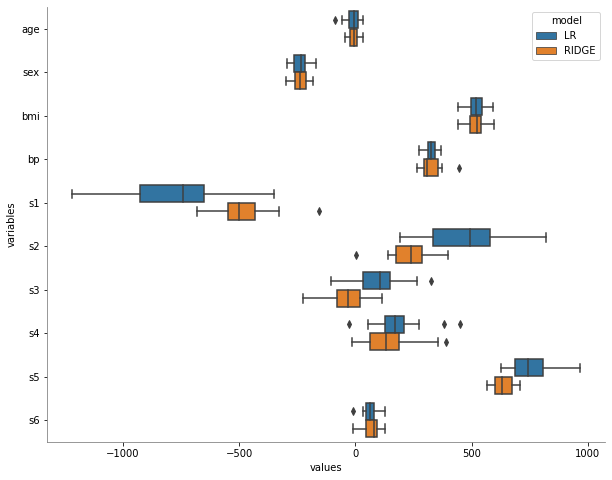

In [11]:
#
# Comparación
#
coefs = pd.concat(
    [coefs_lr, coefs_ridge],
    ignore_index=True,
)

coefs = pd.melt(
    coefs,
    id_vars="model",
    var_name="variables",
    value_name="values",
)

plt.figure(figsize=(10, 8))
sns.boxplot(x="values", y="variables", data=coefs, hue="model")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()